In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755898134815.jpg,0.414723,0.198482,0.507370,0.828709,0.637000
1,Dataset/1757521094585.jpg,0.244878,0.247955,0.249145,0.863510,0.615569
2,Dataset/1757528251089.jpg,0.752617,0.733425,0.714149,0.124184,0.610455
3,Dataset/1755898082782.jpg,0.193162,0.687747,0.315762,0.099136,0.601244
4,Dataset/1765045083897.jpg,0.990101,0.773123,0.562061,0.400073,0.567789
...,...,...,...,...,...,...
7591,Dataset/1757521109162.jpg,0.501016,0.319772,0.500000,0.316481,0.003444
7592,Dataset/1755731271364.jpg,0.110673,0.519491,0.113724,0.519542,0.003052
7593,Dataset/1755730493927.jpg,0.858387,0.622737,0.857330,0.620913,0.002108
7594,Dataset/1757583656077.jpg,0.261547,0.299683,0.260489,0.301177,0.001831


In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

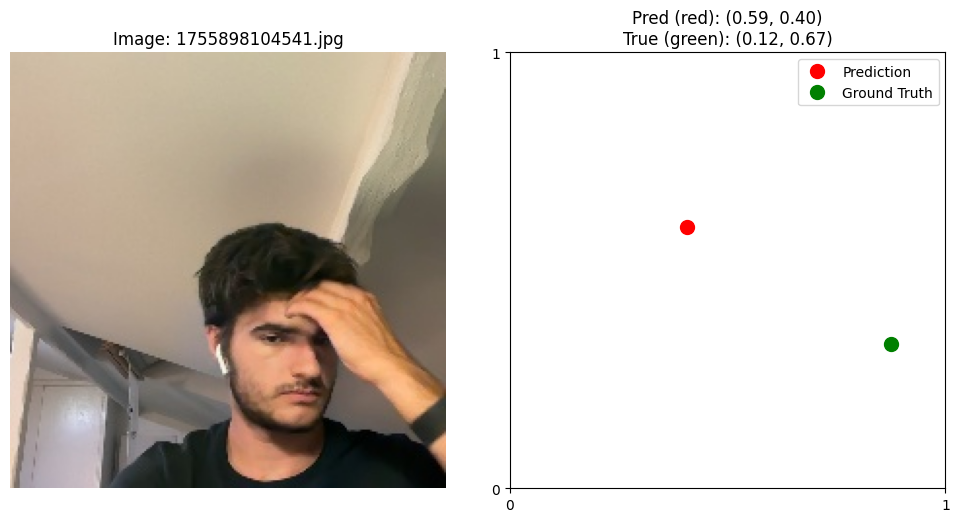

In [3]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1757528251089.jpg', 'Dataset/1755898082782.jpg', 'Dataset/1765045083897.jpg', 'Dataset/1757521093832.jpg', 'Dataset/1757521163778.jpg']


In [5]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 7596
Length of filtered_dataset_df 7591
